<a href="https://colab.research.google.com/github/shemi024/ANN/blob/main/cncer_ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
#load the data
df = pd.read_csv("/content/drive/MyDrive/breast-cancer_csv (1).csv")
df.sample(5)

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
193,60-69,ge40,50-54,0-2,no,2,right,left_up,yes,no-recurrence-events
48,50-59,premeno,50-54,0-2,yes,2,right,left_up,yes,no-recurrence-events
188,50-59,ge40,5-9,0-2,no,2,right,right_up,no,no-recurrence-events
162,60-69,ge40,50-54,0-2,no,2,left,left_low,no,no-recurrence-events
152,50-59,ge40,40-44,3-5,yes,2,left,left_low,no,no-recurrence-events


In [ ]:
df.Class.value_counts()

no-recurrence-events    201
recurrence-events        85
Name: Class, dtype: int64

In [ ]:
  201/df.shape[0]

0.7027972027972028

In [ ]:
df.dtypes


age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object

In [ ]:
df.irradiat.values

array(['no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',


In [ ]:
df[pd.to_numeric(df.irradiat,errors='coerce').isnull()]

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class
0,40-49,premeno,15-19,0-2,yes,3,right,left_up,no,recurrence-events
1,50-59,ge40,15-19,0-2,no,1,right,central,no,no-recurrence-events
2,50-59,ge40,35-39,0-2,no,2,left,left_low,no,recurrence-events
3,40-49,premeno,35-39,0-2,yes,3,right,left_low,yes,no-recurrence-events
4,40-49,premeno,30-34,3-5,yes,2,left,right_up,no,recurrence-events
...,...,...,...,...,...,...,...,...,...,...
281,50-59,ge40,30-34,6-8,yes,2,left,left_low,no,no-recurrence-events
282,50-59,premeno,25-29,3-5,yes,2,left,left_low,yes,no-recurrence-events
283,30-39,premeno,30-34,6-8,yes,2,right,right_up,no,no-recurrence-events
284,50-59,premeno,15-19,0-2,no,2,right,left_low,no,no-recurrence-events


In [ ]:
df.shape


(286, 10)

In [ ]:
df.iloc[285].irradiat

'no'

In [ ]:
df[df.irradiat!=' '].shape

(286, 10)

In [ ]:
#remove rows with space_in Totalcharges
df1 = df[df.irradiat!=' ']
df1.shape

(286, 10)

In [ ]:
df1.dtypes

age            object
menopause      object
tumor-size     object
inv-nodes      object
node-caps      object
deg-malig       int64
breast         object
breast-quad    object
irradiat       object
Class          object
dtype: object

In [ ]:
df1.irradiat = pd.to_numeric(df1.irradiat)

ValueError: ignored

In [ ]:
df1.irradiat.values

array(['no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no',
       'yes', 'no', 'no', 'no', 'no', 'yes', 'yes', 'yes', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'yes',
       'yes', 'no', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',
       'no', 'no', 'no', 'yes', 'no', 'no', 'yes', 'no', 'yes', 'no',
       'no', 'no', 'no', 'yes', 'yes', 'no', 'no', 'no', 'no', 'yes',
       'no', 'yes', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no',
       'no', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes',


In [ ]:
df1[df1.Class=='No']

,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat,Class


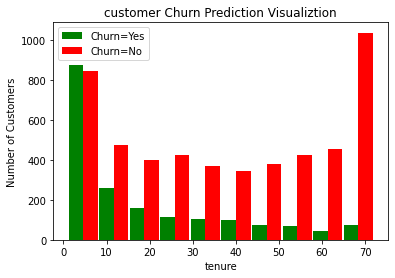

In [ ]:
#data visualization
tenure_Class_no = df1[df1.Class=='No'].tenure
tenure_Class_yes = df1[df1.Class=='Yes'].tenure

plt.xlabel("Class")
plt.ylabel("irradiat")
plt.title("cancer ")

blood_sugar_men =[113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women =[67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

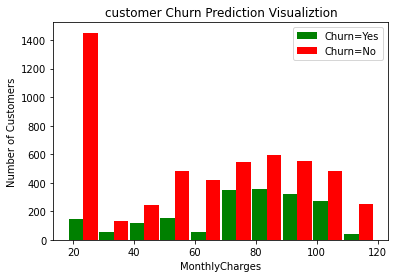

In [ ]:
#data visualization
mc_churn_no = df1[df1.Churn=='No'].MonthlyCharges
mc_churn_yes = df1[df1.Churn=='Yes'].MonthlyCharges

plt.xlabel("MonthlyCharges")
plt.ylabel("Number of Customers")
plt.title("customer Churn Prediction Visualiztion")

blood_sugar_men =[113,85,90,150,149,88,93,115,135,80,77,82,129]
blood_sugar_women =[67,98,89,120,133,150,84,69,89,79,120,112,100]

plt.hist([mc_churn_yes, mc_churn_no], rwidth=0.95, color=['green','red'],label=['Churn=Yes','Churn=No'])
plt.legend()

In [ ]:
def print_unique_col_values(df):
  for column in df:
    if df [column].dtypes=='object':
      print(f'{column}:{df[column].unique()}')

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No phone service' 'No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes' 'No internet service']
OnlineBackup:['Yes' 'No' 'No internet service']
DeviceProtection:['No' 'Yes' 'No internet service']
TechSupport:['No' 'Yes' 'No internet service']
StreamingTV:['No' 'Yes' 'No internet service']
StreamingMovies:['No' 'Yes' 'No internet service']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
df1.replace('No internet service','No',inplace=True)
df1.replace('No phone service','No',inplace=True)

In [ ]:
print_unique_col_values(df1)

gender:['Female' 'Male']
Partner:['Yes' 'No']
Dependents:['No' 'Yes']
PhoneService:['No' 'Yes']
MultipleLines:['No' 'Yes']
InternetService:['DSL' 'Fiber optic' 'No']
OnlineSecurity:['No' 'Yes']
OnlineBackup:['Yes' 'No']
DeviceProtection:['No' 'Yes']
TechSupport:['No' 'Yes']
StreamingTV:['No' 'Yes']
StreamingMovies:['No' 'Yes']
Contract:['Month-to-month' 'One year' 'Two year']
PaperlessBilling:['Yes' 'No']
PaymentMethod:['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn:['No' 'Yes']


In [ ]:
yes_no_columns=['Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies',
                'PaperlessBilling','Churn']
for col in yes_no_columns:
  df1[col].replace({'Yes':1,'No':0},inplace=True)

In [ ]:
for col in df1:
  print(f'{col}: {df1[col].unique()}')

gender: ['Female' 'Male']
SeniorCitizen: [0 1]
Partner: [1 0]
Dependents: [0 1]
tenure: [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26 39]
PhoneService: [0 1]
MultipleLines: [0 1]
InternetService: ['DSL' 'Fiber optic' 'No']
OnlineSecurity: [0 1]
OnlineBackup: [1 0]
DeviceProtection: [0 1]
TechSupport: [0 1]
StreamingTV: [0 1]
StreamingMovies: [0 1]
Contract: ['Month-to-month' 'One year' 'Two year']
PaperlessBilling: [1 0]
PaymentMethod: ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges: [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges: [  29.85 1889.5   108.15 ...  346.45  306.6  6844.5 ]
Churn: [0 1]


In [ ]:
df1['gender'].replace({'Female':1,'Male':0},inplace=True)

In [ ]:
df1.gender.unique()

array([1, 0])

In [ ]:
df2=pd.get_dummies(data=df1, columns=['InternetService','Contract','PaymentMethod'])
df2.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'PaperlessBilling', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'InternetService_DSL', 'InternetService_Fiber optic',
       'InternetService_No', 'Contract_Month-to-month', 'Contract_One year',
       'Contract_Two year', 'PaymentMethod_Bank transfer (automatic)',
       'PaymentMethod_Credit card (automatic)',
       'PaymentMethod_Electronic check', 'PaymentMethod_Mailed check'],
      dtype='object')

In [ ]:
df2.sample(5)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
6967,0,1,0,0,25,1,1,0,1,0,...,0,1,0,1,0,0,0,0,1,0
2228,1,1,1,0,70,1,1,0,1,0,...,0,1,0,0,0,1,1,0,0,0
134,0,0,0,0,2,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
5017,1,0,1,0,41,0,0,0,1,0,...,1,0,0,0,1,0,0,0,0,1
2910,1,0,1,1,35,1,1,0,0,0,...,0,0,1,0,0,1,0,1,0,0


In [ ]:

df2.dtypes

gender                                       int64
SeniorCitizen                                int64
Partner                                      int64
Dependents                                   int64
tenure                                       int64
PhoneService                                 int64
MultipleLines                                int64
OnlineSecurity                               int64
OnlineBackup                                 int64
DeviceProtection                             int64
TechSupport                                  int64
StreamingTV                                  int64
StreamingMovies                              int64
PaperlessBilling                             int64
MonthlyCharges                             float64
TotalCharges                               float64
Churn                                        int64
InternetService_DSL                          uint8
InternetService_Fiber optic                  uint8
InternetService_No             

In [ ]:
cols_to_scale=['tenure','MonthlyCharges','TotalCharges']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2[cols_to_scale] = scaler.fit_transform(df2[cols_to_scale])

In [ ]:
for col in df2:
  print(f'{col}:{df2[col].unique()}')

gender:[1 0]
SeniorCitizen:[0 1]
Partner:[1 0]
Dependents:[0 1]
tenure:[0.         0.46478873 0.01408451 0.61971831 0.09859155 0.29577465
 0.12676056 0.38028169 0.85915493 0.16901408 0.21126761 0.8028169
 0.67605634 0.33802817 0.95774648 0.71830986 0.98591549 0.28169014
 0.15492958 0.4084507  0.64788732 1.         0.22535211 0.36619718
 0.05633803 0.63380282 0.14084507 0.97183099 0.87323944 0.5915493
 0.1971831  0.83098592 0.23943662 0.91549296 0.11267606 0.02816901
 0.42253521 0.69014085 0.88732394 0.77464789 0.08450704 0.57746479
 0.47887324 0.66197183 0.3943662  0.90140845 0.52112676 0.94366197
 0.43661972 0.76056338 0.50704225 0.49295775 0.56338028 0.07042254
 0.04225352 0.45070423 0.92957746 0.30985915 0.78873239 0.84507042
 0.18309859 0.26760563 0.73239437 0.54929577 0.81690141 0.32394366
 0.6056338  0.25352113 0.74647887 0.70422535 0.35211268 0.53521127]
PhoneService:[0 1]
MultipleLines:[0 1]
OnlineSecurity:[0 1]
OnlineBackup:[1 0]
DeviceProtection:[0 1]
TechSupport:[0 1]
Stream

In [ ]:

x= df2.drop('Churn',axis='columns')
y = testLabels = df2.Churn.astype(np.float32)

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y,test_size=0.2,random_state=5)

In [ ]:
y_train.value_counts()

0.0    4164
1.0    1461
Name: Churn, dtype: int64

In [ ]:
y_train.value_counts()

0.0    4164
1.0    1461
Name: Churn, dtype: int64

In [ ]:
5163/1869

2.7624398073836276

In [ ]:
y_test.value_counts()

0.0    999
1.0    408
Name: Churn, dtype: int64

In [ ]:
x_train.shape

(5625, 26)

In [ ]:
x_test.shape

(1407, 26)

In [ ]:
x_train[:10]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
5664,1,1,0,0,0.126761,1,0,0,0,1,...,0,1,0,1,0,0,0,1,0,0
101,1,0,1,1,0.000000,1,0,0,0,0,...,0,0,1,1,0,0,0,0,1,0
2621,0,0,1,0,0.985915,1,0,0,1,1,...,1,0,0,0,0,1,0,1,0,0
392,1,1,0,0,0.014085,1,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
1327,0,0,1,0,0.816901,1,1,0,0,1,...,0,1,0,0,1,0,1,0,0,0
3607,1,0,0,0,0.169014,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,1
2773,0,0,1,0,0.323944,0,0,0,0,1,...,1,0,0,1,0,0,0,0,1,0
1936,1,0,1,0,0.704225,1,0,1,1,0,...,1,0,0,0,1,0,1,0,0,0
5387,0,0,0,0,0.042254,0,0,0,0,0,...,1,0,0,1,0,0,0,0,1,0
4331,0,0,0,0,0.985915,1,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


In [ ]:
import tensorflow as tf
from tensorflow import keras
from sklearn.metrics import confusion_matrix, classification_report



In [ ]:


def ANN(x_train, y_train, x_test, y_test, loss, weights):
  model = keras.Sequential([
                          keras.layers.Dense(26, input_dim=26,activation='relu'),
                          keras.layers.Dense(15, activation='relu'),
                          keras.layers.Dense(1, activation='sigmoid')
])

  model.compile(optimizer='adam', loss=loss, metrics=['accuracy'])
  if weights == -1:
    model.fit(x_train,y_train, epochs=100)
  else:
    model.fit(x_train,y_train, epochs=100, class_weight = weights)
      
    print(model.evaluate(x_test, y_test))

    y_preds = model.predict(x_test)
    y_preds = np.round(y_preds)

    print("classification report: \n", classification_report(y_test, y_preds))
    return y_preds

In [ ]:
y_preds =ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
176/176 [==============================] - 1s 2ms/step - loss: 0.4933 - accuracy: 0.7543
Epoch 2/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4225 - accuracy: 0.8000
Epoch 3/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4166 - accuracy: 0.8046
Epoch 4/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4136 - accuracy: 0.8037
Epoch 5/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4108 - accuracy: 0.8075
Epoch 6/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4090 - accuracy: 0.8085
Epoch 7/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4078 - accuracy: 0.8089
Epoch 8/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4055 - accuracy: 0.8128
Epoch 9/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4043 - accuracy: 0.8108
Epoch 10/100
176/176 [==============================] - 0s 2ms/step - loss: 0.4027 - accura

In [ ]:
#method 1: undersampling
#class count
#class 1 include 1033 sampling and o class include 374 samples. so there is data imbalance

count_class_0, count_class_1= df1.Churn.value_counts()

#divide by class
df_class_0 = df2[df2['Churn']==0]
df_class_1 = df2[df2['Churn']==1]

In [ ]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('random under-sampling:')
print(df_test_under.Churn.value_counts())

random under-sampling:
0    1869
1    1869
Name: Churn, dtype: int64


In [ ]:
x= df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)


In [ ]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
y_preds =ANN(x_train, y_train, x_test, y_test, 'binary_crossentropy', -1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6241 - accuracy: 0.6796
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5242 - accuracy: 0.7522
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5041 - accuracy: 0.7592
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4935 - accuracy: 0.7612
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4892 - accuracy: 0.7632
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4851 - accuracy: 0.7622
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7672
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7642
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4781 - accuracy: 0.7642
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4777 - accuracy: 0.7679
Epoch 11/

method 2 : over sampling


In [ ]:
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_test_over = pd.concat([df_class_0,df_class_1_over], axis=0)

print('random over-sampling:')
print(df_test_over.Churn.value_counts())


random over-sampling:
0    5163
1    5163
Name: Churn, dtype: int64


In [ ]:
x= df_test_under.drop('Churn', axis='columns')
y = df_test_under['Churn']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)


In [ ]:
y_train.value_counts()

0    1495
1    1495
Name: Churn, dtype: int64

In [ ]:
loss=keras.losses.BinaryCrossentropy()
weights = -1
y_preds = ANN(x_train, y_train, x_test, y_test,'binary_crossentropy',-1)

Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6128 - accuracy: 0.6886
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5143 - accuracy: 0.7508
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.7542
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4927 - accuracy: 0.7625
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4880 - accuracy: 0.7635
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4863 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4825 - accuracy: 0.7612
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7635
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4801 - accuracy: 0.7686
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4776 - accuracy: 0.7639
Epoch 11/

mothode:SMOTE

In [ ]:


x = df2.drop('Churn',axis='columns')
y= df2['Churn']


 


In [ ]:
from imblearn.over_sampling import SMOTE
smote= SMOTE(sampling_strategy='minority')
x_sm, y_sm = smote.fit_resample(x,y)

y_sm.value_counts()

0    5163
1    5163
Name: Churn, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_sm,y_sm,test_size=0.2,random_state=15, stratify=y_sm)

In [ ]:
y_train.value_counts()

1    4130
0    4130
Name: Churn, dtype: int64

In [ ]:
y_preds = ANN(x_train, y_train, x_test, y_test,'binary_crossentropy',-1)

Epoch 1/100
259/259 [==============================] - 1s 2ms/step - loss: 0.5285 - accuracy: 0.7449
Epoch 2/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4758 - accuracy: 0.7734
Epoch 3/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4668 - accuracy: 0.7780
Epoch 4/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4605 - accuracy: 0.7792
Epoch 5/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4561 - accuracy: 0.7810
Epoch 6/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.7867
Epoch 7/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4472 - accuracy: 0.7875
Epoch 8/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4435 - accuracy: 0.7873
Epoch 9/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4392 - accuracy: 0.7943
Epoch 10/100
259/259 [==============================] - 0s 2ms/step - loss: 0.4360 - accura

SMOT oversampling incress f1_score of minority class 1 from 0.58 to 0.81


In [ ]:
#method4 : use of ensample with undersampling
df2.Churn.value_counts()

0    5163
1    1869
Name: Churn, dtype: int64

In [ ]:
 #x= df.drop('Churn', axis='columns')
#y = df['Churn']

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=15, stratify=y)

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

In [ ]:
y_train.value_counts()

0    4130
1    1495
Name: Churn, dtype: int64

model 1-> class1(1495)+ class0(0,1495).

model 2-> class1(1495)+ class0(1496,2990).


model 3-> class1(1495)+ class0(2990,4130)

In [ ]:
df3= x_train.copy()

In [ ]:
df3['Churn'] = y_train

In [ ]:
df3.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn
684,1,0,0,0,0.000000,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
2446,1,0,0,0,0.239437,1,1,0,1,0,...,1,0,1,0,0,0,1,0,0,1
1680,0,0,1,1,0.774648,1,1,0,0,0,...,0,1,0,1,0,0,0,0,1,0
2220,0,0,1,0,1.000000,1,0,1,1,0,...,0,0,0,0,1,1,0,0,0,0
2842,1,0,0,0,0.042254,0,0,1,0,1,...,0,0,1,0,0,0,0,0,1,0


In [ ]:
df3_class0 = df3[df3.Churn==0]
df3_class1 = df3[df3.Churn==1]

In [ ]:
def get_train_batch(df_majority, df_minority, start, end):
  df_train = pd.concat([df_majority[start:end], df_minority],axis=0)


  x_train = df_train.drop('Churn',axis='columns')
  y_train = df_train.Churn
  return x_train, y_train

In [ ]:


x_train, y_train= get_train_batch(df3_class0,df3_class1,0,1495)
y_pred1 = ANN(x_train, y_train, x_test, y_test,'binary_crossentropy',-1)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.5907 - accuracy: 0.7244
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5022 - accuracy: 0.7635
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4921 - accuracy: 0.7689
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4897 - accuracy: 0.7659
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4847 - accuracy: 0.7689
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4810 - accuracy: 0.7702
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4812 - accuracy: 0.7672
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4796 - accuracy: 0.7689
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4775 - accuracy: 0.7709
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4759 - accuracy: 0.7739
Epoch 11/

In [ ]:


x_train, y_train= get_train_batch(df3_class0,df3_class1,1495, 2990)
y_pred2 = ANN(x_train, y_train, x_test, y_test,'binary_crossentropy',-1)


Epoch 1/100
94/94 [==============================] - 1s 2ms/step - loss: 0.6028 - accuracy: 0.6963
Epoch 2/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5164 - accuracy: 0.7478
Epoch 3/100
94/94 [==============================] - 0s 2ms/step - loss: 0.5005 - accuracy: 0.7535
Epoch 4/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4922 - accuracy: 0.7589
Epoch 5/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4875 - accuracy: 0.7622
Epoch 6/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4849 - accuracy: 0.7645
Epoch 7/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4804 - accuracy: 0.7605
Epoch 8/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4768 - accuracy: 0.7656
Epoch 9/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4740 - accuracy: 0.7659
Epoch 10/100
94/94 [==============================] - 0s 2ms/step - loss: 0.4715 - accuracy: 0.7722
Epoch 11/

In [ ]:


x_train, y_train= get_train_batch(df3_class0,df3_class1,2990,4130)
y_pred3 = ANN(x_train, y_train, x_test, y_test,'binary_crossentropy',-1)


Epoch 1/100
83/83 [==============================] - 1s 2ms/step - loss: 0.6026 - accuracy: 0.7028
Epoch 2/100
83/83 [==============================] - 0s 2ms/step - loss: 0.5054 - accuracy: 0.7693
Epoch 3/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4884 - accuracy: 0.7757
Epoch 4/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4839 - accuracy: 0.7765
Epoch 5/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4780 - accuracy: 0.7769
Epoch 6/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4748 - accuracy: 0.7738
Epoch 7/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4725 - accuracy: 0.7727
Epoch 8/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4696 - accuracy: 0.7784
Epoch 9/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4661 - accuracy: 0.7799
Epoch 10/100
83/83 [==============================] - 0s 2ms/step - loss: 0.4633 - accuracy: 0.7841
Epoch 11/

In [ ]:
y_pred_final=  y_pred1.copy()
for i in range(len(y_pred1)):
  n_ones = y_pred1[i] + y_pred2[i] + y_pred3[i]
  if n_ones>1:
    y_pred_final[i] =1
  else:
    y_pred_final[i] =0

AttributeError: ignored

In [ ]:
cl_rep = classification_report(y_test,)